A study is the properties of a lamina / laminate for quasi-isotropicity

Intution says that there should be a discernible "bump" in Ex as the "quasi" laminate is rotated, when in reality, it is very tiny. INTERESTING!

material properties are from Engineering Mechanics of Composite Materials, Daniel

Neal Gordon  
2017-2-3  


In [36]:
from numpy import pi, zeros, ones, linspace, arange, array, sin, cos, sqrt, pi
from numpy.linalg import solve, inv

from matplotlib.pyplot import plot,figure,xlim,ylim,title,legend, \
grid, show, xlabel,ylabel, tight_layout, savefig
import pandas as pd

In [37]:
%matplotlib inline

In [38]:
def T1(th):
    '''Stress Transform for Plane Stress
    th=ply angle in degrees
    voight notation for stress tranform. sigma1 = T1 @ sigmax
    recall T1(th)**-1 == T1(-th)'''
    n = sin(th*pi/180)
    m = cos(th*pi/180)
    T1 = array( [[m**2, n**2, 2*m*n],
                 [n**2, m**2,-2*m*n],
                 [-m*n, m*n,(m**2-n**2)]])
    return T1

def T2(th):
    '''Strain Transform for Plane Stress
    th=ply angle in degrees
    voight notation for strain transform. epsilon1 = T2 @ epsilonx'''
    n = sin(th*pi/180)
    m = cos(th*pi/180)
    T2 = array( [[m**2, n**2, m*n],
                 [n**2, m**2,-m*n],
                 [-2*m*n, 2*m*n,  (m**2-n**2)]])
    return T2

def Qf(E1,E2,nu12,G12):
    '''transversly isptropic compliance matrix. pg 58 herakovich
    G12 = E1/(2*(1+nu12))  if isotropic'''
    nu21 = E2*nu12/E1
    Q = array([[E1/(1-nu12*nu21),    E2*nu12/(1-nu12*nu21), 0],
               [ E2*nu12/(1-nu12*nu21), E2/(1-nu12*nu21),    0],
               [0,        0,       G12]])
    return Q

def plot_properties(layupname, Ex,Ey,nuxy,Gxy,H):
    plt.close('all')

    Q = Qf(Ex,Ey,nuxy,Gxy)

    plyangle = arange(-45, 45.1, 1)

    Exbar = zeros(len(plyangle))
    Eybar = zeros(len(plyangle))
    Gxybar = zeros(len(plyangle))

    Qbar = zeros((len(plyangle),3,3))
    for i,th in enumerate(plyangle):
        Qbar[i] = solve(T1(th), Q) @ T2(th)
    #Qbar = [solve(T1(th),Q) @ T2(th) for th in plyangle]

    Aij = Qbar*H

    # laminate Stiffness
    #     | Exbar    Eybar    Gxybar   |
    # A = | vxybar   vyxbar   etasxbar |
    #     | etaxsbar etaysbar etasybar |

    # laminate Comnpliance
    aij = zeros((len(plyangle),3,3))
    for i, _Aij in enumerate(Aij):
        aij[i] = inv(_Aij)

    # material properties for whole laminate (Daniel, pg183)
    Exbar  = [1/(H*_aij[0,0]) for _aij in aij] 
    Eybar  = [1/(H*_aij[1,1]) for _aij in aij] 
    Gxybar = [1/(H*_aij[2,2]) for _aij in aij] 

    df = pd.DataFrame({'plyangle':plyangle, 'Exbar':Exbar, 'Eybar':Eybar,'Gxybar':Gxybar})
    #print(df)
    df.to_csv('Laminate Properties varying angle for E-Glass Epoxy fabric M10E-3783 {}.csv'.format(layupname))

    plt.figure(figsize=(12,8))
    plot(plyangle, Exbar, label = r"Modulus: $E_x$")
    plot(plyangle, Eybar, label = r"Modulus: $E_y$")
    plot(plyangle, Gxybar, label = r"Modulus: $G_{xy}$")
    title("Laminate Properties varying angle for E-Glass Epoxy fabric M10E-3783 {}".format(layupname))
    xlabel("$\Theta$")
    ylim([0,4e6])
    ylabel("modulus, psi")
    legend(loc='best')
    grid()

    savefig('Laminate Properties varying angle for E-Glass Epoxy fabric M10E-3783 {}.png'.format(layupname))


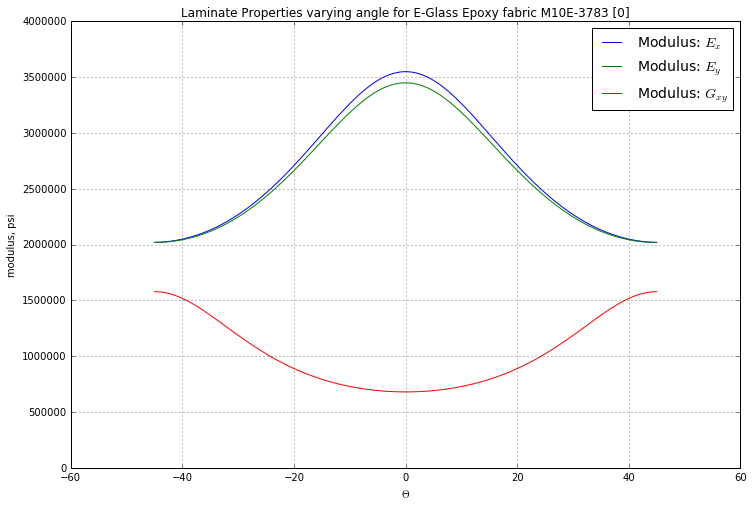

In [39]:
layupname = '[0]'
Ex=   3550000.00
Ey=   3450000.00
nuxy= 0.11
Gxy=  680000.00   
H=    0.0150 

plot_properties(layupname, Ex,Ey,nuxy,Gxy,H)

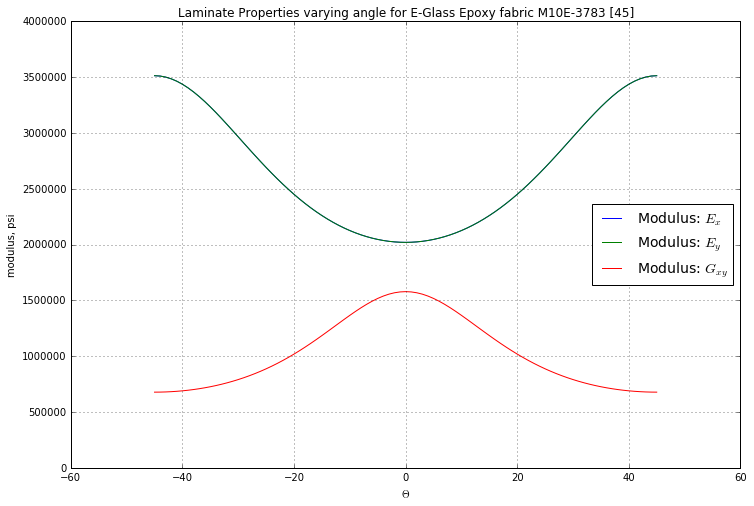

In [40]:
layupname = '[45]'
Ex=   2020037.13
Ey=   2020037.13
nuxy= 0.49
Gxy=  1578489.50    
H =   0.0150

plot_properties(layupname, Ex,Ey,nuxy,Gxy,H)

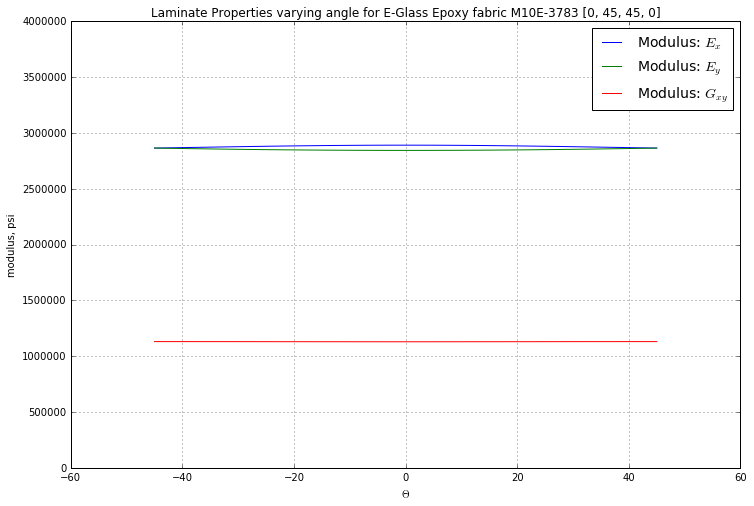

In [41]:
layupname = '[0, 45, 45, 0]'
Ex=   2890983.38
Ey=   2844063.06
nuxy= 0.27
Gxy=  1129326.25
H =   0.0600

plot_properties(layupname, Ex,Ey,nuxy,Gxy,H)

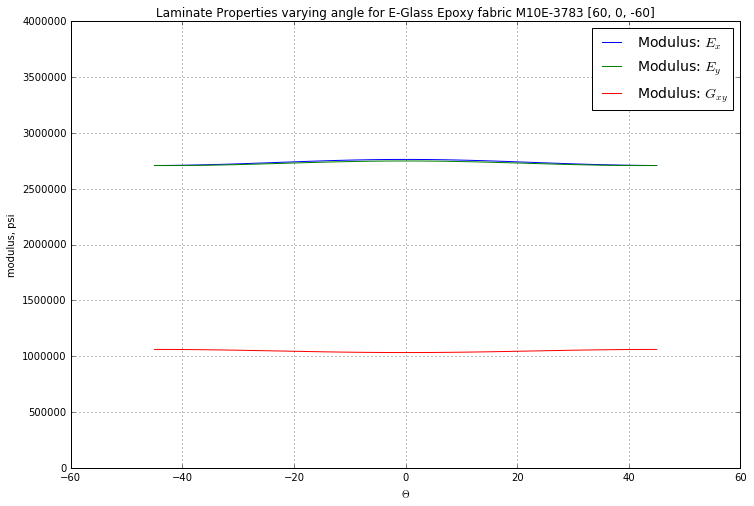

In [42]:
layupname = [60, 0, -60]
Ex=   2763160.75
Ey=   2749303.19
nuxy= 0.30
Gxy=  1032764.64
H = 0.0450

plot_properties(layupname, Ex,Ey,nuxy,Gxy,H)